In [1]:
import os
os.chdir('P:\SAMPLE DATA')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report, precision_recall_curve
from sklearn.datasets import make_classification

from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
import time
from contextlib import contextmanager

In [4]:
df=pd.read_excel('2017.xlsx')

In [5]:
bank_data=df.copy()

In [4]:
bank_data=df.sample(n=100000)

In [5]:
bank_data

,CMemNo,Description,Failed,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,SuppID,InvNet (SUM),Member Type,Town,Member Join Date
518178,694907,AIR FILTER,NaN,2017-11-01,2017-12-26,General - Machinery,MC-MS,Machinery,T00017,34.25,Associate,Saffron Walden,2015-08-05
380088,664307,Electricity (Non-HH),NaN,2017-08-22,2017-09-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,B00141,-87.09,Full,Wellingborough,2013-04-10
304483,693450,"Machinery Tools, Vehicle Parts & Spares",NaN,2017-07-10,2017-08-26,General - Machinery,MC-MS,Machinery,D00128,24.07,Full,Kings Lynn,1961-12-22
632127,662084,IT Equipment,NaN,2018-01-10,2018-02-26,General - Supplies,MS-IT,General Supplies,F00012,1144.80,2nd Account,Great Yarmouth,1990-01-01
387799,663165,Electricity (Non-HH),NaN,2017-08-29,2017-09-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,S00214,171.16,Associate,Hessle,2009-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
654768,671712,COUPLING,NaN,2018-01-26,2018-02-26,General - Machinery,MC-MS,Machinery,B00081,226.51,Full,Norwich,1996-01-11
70434,662950,Red Diesel 590,NaN,2017-03-14,2017-04-30,Liquid,FL-ULSG,Liquid Fuel,W00052,4890.00,Full,Thetford,2008-06-06
607388,664389,Propane (Bulk),NaN,2017-12-30,2018-01-26,LPG & Solid fuels,GS-BU,LPG & Solid Fuel,C00002,577.22,Full,Ormskirk,2013-08-07
153304,671194,Telecoms Hardware Payment Plan,NaN,2017-04-26,2017-12-26,Accounts,AF-HWFINANCE,Non Service Charge,A00307,164.40,Full,Norwich,1990-01-01


In [6]:
bank_data['Failed']=bank_data['Failed'].fillna('success')

In [7]:
bank_data["Failed"].replace({"success":1, "Failed": 0}, inplace=True)

In [7]:
bank_data.rename(columns={'InvNet (SUM)':'sales'},inplace=True)

In [8]:
bank_data['Zerosales'] = (bank_data.sales == 0).astype(int)
bank_data

,CMemNo,Description,Failed,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,SuppID,sales,Member Type,Town,Member Join Date,Zerosales
0,617111,Electricity (Non-HH),success,2011-12-13,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,S00250,-140.68,Billing Account - Full Plus,Thetford,2012-08-08,0
1,617111,Electricity (Non-HH),success,2012-03-02,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,S00250,-390.41,Billing Account - Full Plus,Thetford,2012-08-08,0
2,617111,Electricity (Non-HH),success,2012-06-11,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,S00250,-390.07,Billing Account - Full Plus,Thetford,2012-08-08,0
3,617111,Electricity (Non-HH),success,2012-09-12,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,S00250,-323.84,Billing Account - Full Plus,Thetford,2012-08-08,0
4,617111,Electricity (Non-HH),success,2012-12-12,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,S00250,-366.54,Billing Account - Full Plus,Thetford,2012-08-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675278,671300,Miscellaneous Items,success,2018-02-19,2018-02-26,General - Supplies,MS-MISC,General Supplies,M00115,-806.08,Full,North Walsham,1978-06-09,0
675279,662718,Misc Spray Chemicals,success,2018-02-20,2018-02-26,Agrochemicals,CH-MISC,Crop Protection,D00072,-1990.00,Full,Kings Lynn,2007-10-31,0
675280,614139,Livestock Equipment,success,2018-02-21,2018-02-26,Livestock Products,SU-LEQIP,Livestock Products,T00162,-210.00,Full,Belper,2017-11-08,0
675281,693098,Broadband Service,success,2018-02-21,2018-02-26,Fixed & Broadband,MS-BBAND,Telecoms,I00020,-44.64,Full,Norwich,1985-07-11,0


In [9]:
bank_data.drop(['InvPaymentDate','InvDate','ProdCategory','ProdCode','SuppID'],axis=1,inplace=True)

In [10]:
bank_data.reset_index(inplace=True)

In [11]:
bank_data.drop(['index','Description'],axis=1,inplace=True)

In [12]:
bank_data

,CMemNo,Failed,ProductAreaName,sales,Member Type,Town,Member Join Date,Zerosales
0,617111,success,Non HH Electricity & Mains Gas,-140.68,Billing Account - Full Plus,Thetford,2012-08-08,0
1,617111,success,Non HH Electricity & Mains Gas,-390.41,Billing Account - Full Plus,Thetford,2012-08-08,0
2,617111,success,Non HH Electricity & Mains Gas,-390.07,Billing Account - Full Plus,Thetford,2012-08-08,0
3,617111,success,Non HH Electricity & Mains Gas,-323.84,Billing Account - Full Plus,Thetford,2012-08-08,0
4,617111,success,Non HH Electricity & Mains Gas,-366.54,Billing Account - Full Plus,Thetford,2012-08-08,0
...,...,...,...,...,...,...,...,...
675278,671300,success,General Supplies,-806.08,Full,North Walsham,1978-06-09,0
675279,662718,success,Crop Protection,-1990.00,Full,Kings Lynn,2007-10-31,0
675280,614139,success,Livestock Products,-210.00,Full,Belper,2017-11-08,0
675281,693098,success,Telecoms,-44.64,Full,Norwich,1985-07-11,0


In [14]:
bank_data['ProductAreaName'].unique()

array(['Machinery', 'Non HH Electricity & Mains Gas', 'General Supplies',
       'Crop Protection', 'Livestock Products', 'LPG & Solid Fuel',
       'Rebates', 'Fuel Cards', 'Building Materials', 'Liquid Fuel',
       'Non Service Charge', 'Telecoms', 'Fertiliser',
       'Feed & Animal Health & Vets Fees', 'Seed', 'HH Electricity',
       'Rodenticides', 'Insurance', 'Liquid fuel (10k + orders)',
       'Contract Services', 'Renewables & Steel Buildings'], dtype=object)

In [15]:
bank_data['Member Type'].unique()

array(['Associate', 'Full', '2nd Account', 'AF First Milk',
       'Borders Machinery Ring',
       'Association of Independent Crop Consultants', 'Full Plus',
       'Samco and Shrim', 'Retired Staff', 'Tesco ProducerClub – 2nd Acc',
       'Tesco ProducerClub – Full', 'Prompt Pay - Full',
       'Billing Account - Associate',
       'Waitrose Farming Partnership - Full', 'Staff',
       'Waitrose Farming Partnership - Associate',
       'Waitrose Farming Partnership - 2nd Acc', 'LandServices',
       'Shareholders sub account', 'Highland Business Services',
       'Agrevise - Full', 'Morrisons - Full',
       'Orion Farming Group - Associate', '2nd Account - Full Plus',
       'Intergroup', 'Newsletter', 'Billing Account - Full',
       'LandServices Waste', 'AF PRomote', 'Lifestyle Charge Card',
       'Derwent Buying Group - Associate', 'Buying Groups',
       'Tesco ProducerClub – Full Plus', 'Aspatria Farmers',
       'Thoroughbred Breeders Association - Associate',
       'Tesco

In [40]:
#One Hot Encode categorical features
categoricals = ['ProductAreaName', 'Member Type']
ohe = OneHotEncoder(sparse=False)
cat_matrix_train = ohe.fit_transform(bank_data.loc[:, categoricals])
data_ohe = pd.DataFrame(cat_matrix_train,
                           columns=ohe.get_feature_names(categoricals), 
                           index=bank_data.index)
data_ohe.columns = ['Non Service Charge', 'Machinery', 'Fuel Cards',
       'LPG & Solid Fuel', 'Livestock Products', 'Building Materials',
       'Non HH Electricity & Mains Gas', 'General Supplies', 'Fertiliser',
       'Telecoms', 'Seed', 'Insurance', 'Crop Protection',
       'Feed & Animal Health & Vets Fees', 'Rebates', 'Liquid Fuel',
       'HH Electricity', 'Liquid fuel (10k + orders)', 'Rodenticides',
       'Contract Services', 'Renewables & Steel Buildings','Full', 'Tesco ProducerClub – Full', 'Associate',
       'Samco and Shrim', 'Waitrose Farming Partnership - Associate',
       'Full Plus', 'Staff', '2nd Account', 'Intergroup', 'Retired Staff',
       'Newsletter', 'Waitrose Farming Partnership - Full',
       '2nd Account - Full Plus', 'Highland Business Services',
       'Prompt Pay - Full', 'Agrevise - Full',
       'Association of Independent Crop Consultants',
       'Borders Machinery Ring', 'AF First Milk', 'Morrisons - Full',
       'Billing Account - Associate', 'Orion Farming Group - Associate',
       'Billing Account - Full', 'Shareholders sub account',
       'Pembroke Machinery Ring', 'Buying Groups',
       'Waitrose Farming Partnership - 2nd Acc', 'Prompt Pay - Associate',
       'Tesco ProducerClub – Full Plus',
       'Organic Milk Suppliers Co-operative - Full',
       'Tesco ProducerClub – 2nd Acc', 'Agrevise - 2nd Acc',
       'Thames & Kennet Machinery Ring', 'Agrevise - Associate',
       'LandServices', 'Thoroughbred Breeders Association - Associate',
       'AF PRomote', 'Tesco ProducerClub – Associate',
       'Derwent Buying Group - Associate', 'ADD TEN - Full',
       'Morrisons - Associate',
       'Organic Milk Suppliers Co-operative – Associate',
       'Visit East Anglia - Associate', 'Aspatria Farmers',
       'Lifestyle Charge Card']
bank_data = pd.concat([bank_data, data_ohe], axis=1)
bank_data

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CMemNo,Failed,ProductAreaName,sales,Member Type,Town,Member Join Date,Zerosales,Non Service Charge,Machinery,...,Thoroughbred Breeders Association - Associate,AF PRomote,Tesco ProducerClub – Associate,Derwent Buying Group - Associate,ADD TEN - Full,Morrisons - Associate,Organic Milk Suppliers Co-operative – Associate,Visit East Anglia - Associate,Aspatria Farmers,Lifestyle Charge Card
0,662088,1,Non Service Charge,53.32,Full,Norwich,2004-10-27,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,662553,1,Machinery,510.38,Full,Kings Lynn,2007-02-13,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,693048,1,Machinery,97.26,Full,Norwich,1970-04-27,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,693175,1,Fuel Cards,5.00,Tesco ProducerClub – Full,Attleborough,1993-10-29,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,662007,1,Non Service Charge,-21.90,Full,Wisbech,2004-03-09,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,693453,1,Machinery,1370.00,Full,Norwich,1996-07-29,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,693178,1,Fuel Cards,13.01,Associate,Kings Lynn,1984-08-09,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,663883,1,Telecoms,110.55,Associate,Norwich,2012-03-08,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,694478,1,General Supplies,150.72,Associate,Huntingdon,2015-05-05,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sns.pairplot(bank_data, hue = 'Failed',diag_kind = 'hist')

In [44]:
bank_data.columns

Index(['CMemNo', 'Failed', 'ProductAreaName', 'sales', 'Member Type', 'Town',
       'Member Join Date', 'Zerosales', 'Non Service Charge', 'Machinery',
       'Fuel Cards', 'LPG & Solid Fuel', 'Livestock Products',
       'Building Materials', 'Non HH Electricity & Mains Gas',
       'General Supplies', 'Fertiliser', 'Telecoms', 'Seed', 'Insurance',
       'Crop Protection', 'Feed & Animal Health & Vets Fees', 'Rebates',
       'Liquid Fuel', 'HH Electricity', 'Liquid fuel (10k + orders)',
       'Rodenticides', 'Contract Services', 'Renewables & Steel Buildings',
       'Full', 'Tesco ProducerClub – Full', 'Associate', 'Samco and Shrim',
       'Waitrose Farming Partnership - Associate', 'Full Plus', 'Staff',
       '2nd Account', 'Intergroup', 'Retired Staff', 'Newsletter',
       'Waitrose Farming Partnership - Full', '2nd Account - Full Plus',
       'Highland Business Services', 'Prompt Pay - Full', 'Agrevise - Full',
       'Association of Independent Crop Consultants', 'Borders

,CMemNo,Failed,sales,Zerosales,Non Service Charge,Machinery,Fuel Cards,LPG & Solid Fuel,Livestock Products,Building Materials,...,Thoroughbred Breeders Association - Associate,AF PRomote,Tesco ProducerClub – Associate,Derwent Buying Group - Associate,ADD TEN - Full,Morrisons - Associate,Organic Milk Suppliers Co-operative – Associate,Visit East Anglia - Associate,Aspatria Farmers,Lifestyle Charge Card
CMemNo,1.000000,0.007511,-0.000214,-0.002800,0.017626,0.004852,-0.004897,-0.007352,-0.015859,-0.056524,...,-0.003888,0.026876,-0.039032,0.009530,-0.063954,0.007942,0.009604,-0.002221,0.013582,-0.013146
Failed,0.007511,1.000000,0.006884,-0.012820,0.007508,0.002280,0.019993,-0.006648,0.008509,-0.032124,...,0.001819,0.001684,-0.019570,0.002751,0.001819,0.001819,0.000687,0.002918,-0.019158,0.011026
sales,-0.000214,0.006884,1.000000,-0.019121,-0.057013,0.014051,0.064668,0.029168,0.302668,-0.051787,...,0.003789,-0.004101,0.003320,0.017335,-0.002368,-0.003232,-0.000673,0.001964,-0.006267,0.006153
Zerosales,-0.002800,-0.012820,-0.019121,1.000000,-0.010489,-0.002663,-0.016876,0.002158,0.010629,-0.026184,...,-0.002124,-0.001966,0.014456,-0.003213,-0.002124,-0.002124,-0.000803,-0.003408,-0.005022,0.003155
Non Service Charge,0.017626,0.007508,-0.057013,-0.010489,1.000000,-0.012295,-0.132635,-0.061600,-0.045875,-0.120875,...,-0.009806,0.028528,-0.017745,0.000528,0.001800,-0.009806,-0.003705,-0.015733,0.011291,-0.010392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Morrisons - Associate,0.007942,0.001819,-0.003232,-0.002124,-0.009806,-0.000878,-0.009475,-0.004400,-0.003277,0.004188,...,-0.000700,-0.000648,-0.002892,-0.001060,-0.000700,1.000000,-0.000265,-0.001124,-0.001656,-0.004247
Organic Milk Suppliers Co-operative – Associate,0.009604,0.000687,-0.000673,-0.000803,-0.003705,-0.000332,-0.003580,-0.001663,-0.001238,-0.003263,...,-0.000265,-0.000245,-0.001093,-0.000400,-0.000265,-0.000265,1.000000,-0.000425,-0.000626,-0.001605
Visit East Anglia - Associate,-0.002221,0.002918,0.001964,-0.003408,-0.015733,-0.001409,-0.000333,0.007521,-0.005258,0.002147,...,-0.001124,-0.001040,-0.004640,-0.001700,-0.001124,-0.001124,-0.000425,1.000000,-0.002657,-0.006814
Aspatria Farmers,0.013582,-0.019158,-0.006267,-0.005022,0.011291,-0.002076,-0.022400,0.009430,-0.007748,0.033998,...,-0.001656,-0.001533,-0.006838,-0.002505,-0.001656,-0.001656,-0.000626,-0.002657,1.000000,-0.010040


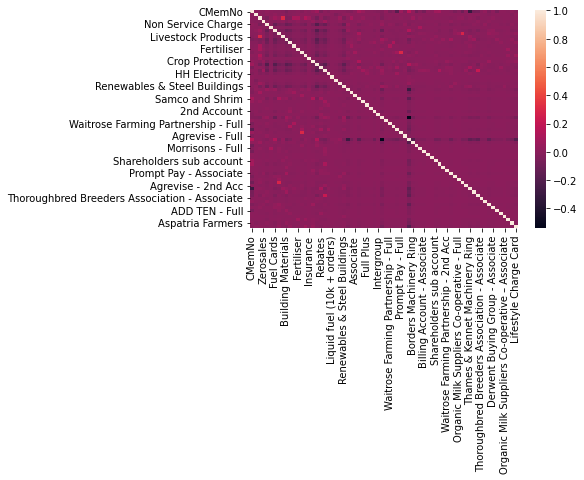

<Figure size 1440x1152 with 0 Axes>

In [42]:
sns.heatmap(bank_data.corr())
plt.figure(figsize=(20, 16))
bank_data.corr()

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Failed', ylabel='count'>

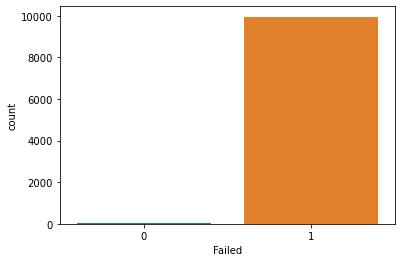

In [50]:
# Distribution of target, will need to be balanced
sns.countplot(bank_data.Failed)

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


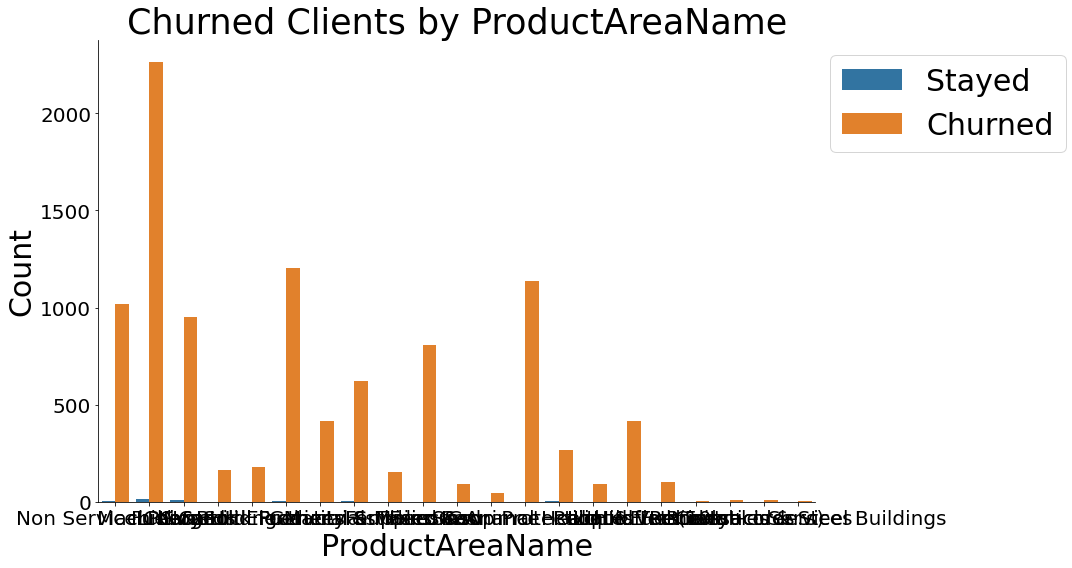

In [52]:
#plot churned clients by gender

plt.figure(figsize=(15, 8))
sns.countplot(bank_data.ProductAreaName, hue = bank_data.Failed)
plt.ylabel('Count', fontsize=30)
plt.xlabel('ProductAreaName', fontsize = 30)
plt.title("Churned Clients by ProductAreaName", fontsize = 35)
plt.legend(labels=['Stayed', 'Churned'], bbox_to_anchor=(1, 1), fontsize= 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
sns.despine()

In [57]:


plt.figure(figsize=(900,50))
sns.countplot(bank_data['Member Type'], hue = bank_data.Failed)
plt.ylabel('Count', fontsize=30)
plt.xlabel('Member Type', fontsize = 30)
plt.title("Churned Clients by Member Type", fontsize = 35)
plt.legend(labels=['Stayed', 'Churned'], bbox_to_anchor=(1, 1), fontsize= 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
sns.despine()

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


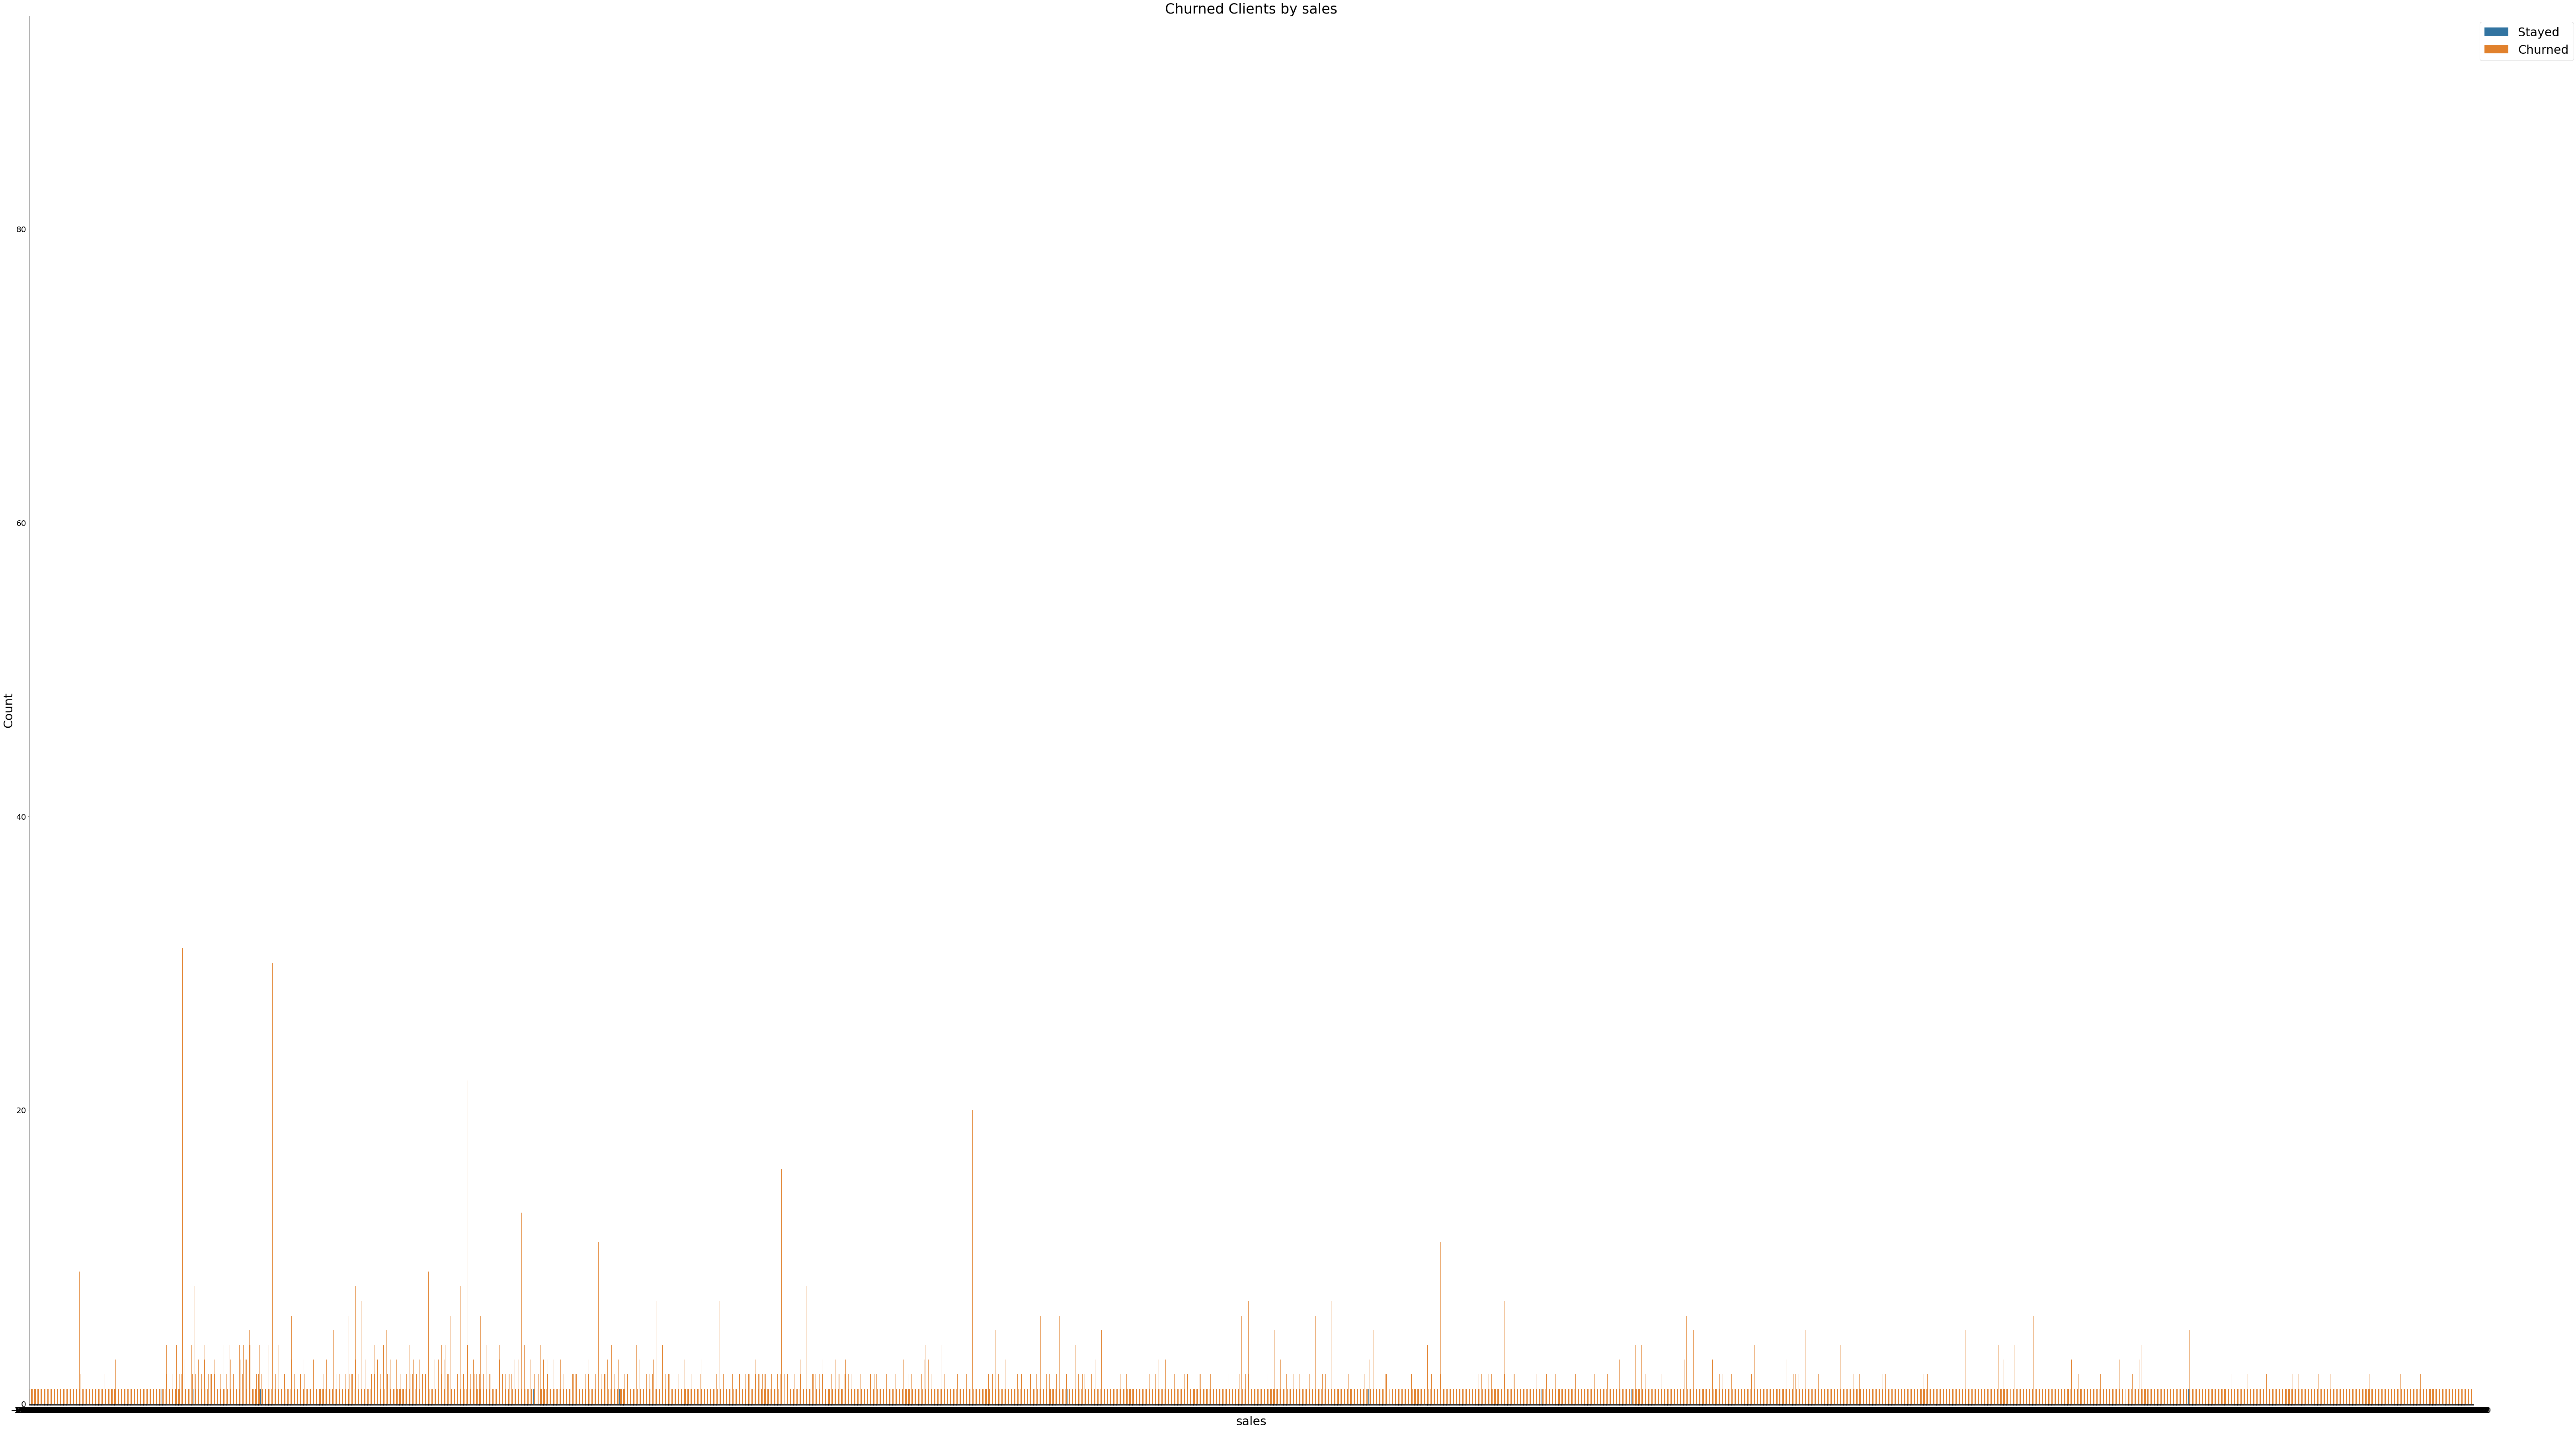

In [59]:

plt.figure(figsize=(90,50))
sns.countplot(bank_data['sales'], hue = bank_data.Failed)
plt.ylabel('Count', fontsize=30)
plt.xlabel('sales', fontsize = 30)
plt.title("Churned Clients by sales", fontsize = 35)
plt.legend(labels=['Stayed', 'Churned'], bbox_to_anchor=(1, 1), fontsize= 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
sns.despine()

In [60]:
bank_data.drop('Town', axis=1,inplace=True)

In [100]:
bank_data['Failed'].value_counts()

1    9953
0      47
Name: Failed, dtype: int64

In [13]:
bank_data['year of joning']=pd.to_datetime(bank_data["Member Join Date"], format="%d/%m/%Y").dt.year
bank_data['month of joining']=pd.to_datetime(bank_data["Member Join Date"], format="%d/%m/%Y").dt.month
bank_data['day of joining']=pd.to_datetime(bank_data["Member Join Date"], format="%d/%m/%Y").dt.day

In [14]:
bank_data.to_csv('csv.csv')

In [67]:
bank_data.drop(['ProductAreaName','Member Join Date'],axis=1,inplace=True)

In [69]:
bank_data.drop('Member Type',axis=1,inplace=True)

In [70]:
features = ['CMemNo', 'sales','Zerosales', 'Non Service Charge', 'Machinery',
       'Fuel Cards', 'LPG & Solid Fuel', 'Livestock Products',
       'Building Materials', 'Non HH Electricity & Mains Gas',
       'General Supplies', 'Fertiliser', 'Telecoms', 'Seed', 'Insurance',
       'Crop Protection', 'Feed & Animal Health & Vets Fees', 'Rebates',
       'Liquid Fuel', 'HH Electricity', 'Liquid fuel (10k + orders)',
       'Rodenticides', 'Contract Services', 'Renewables & Steel Buildings',
       'Full', 'Tesco ProducerClub – Full', 'Associate', 'Samco and Shrim',
       'Waitrose Farming Partnership - Associate', 'Full Plus', 'Staff',
       '2nd Account', 'Intergroup', 'Retired Staff', 'Newsletter',
       'Waitrose Farming Partnership - Full', '2nd Account - Full Plus',
       'Highland Business Services', 'Prompt Pay - Full', 'Agrevise - Full',
       'Association of Independent Crop Consultants', 'Borders Machinery Ring',
       'AF First Milk', 'Morrisons - Full', 'Billing Account - Associate',
       'Orion Farming Group - Associate', 'Billing Account - Full',
       'Shareholders sub account', 'Pembroke Machinery Ring', 'Buying Groups',
       'Waitrose Farming Partnership - 2nd Acc', 'Prompt Pay - Associate',
       'Tesco ProducerClub – Full Plus',
       'Organic Milk Suppliers Co-operative - Full',
       'Tesco ProducerClub – 2nd Acc', 'Agrevise - 2nd Acc',
       'Thames & Kennet Machinery Ring', 'Agrevise - Associate',
       'LandServices', 'Thoroughbred Breeders Association - Associate',
       'AF PRomote', 'Tesco ProducerClub – Associate',
       'Derwent Buying Group - Associate', 'ADD TEN - Full',
       'Morrisons - Associate',
       'Organic Milk Suppliers Co-operative – Associate',
       'Visit East Anglia - Associate', 'Aspatria Farmers',
       'Lifestyle Charge Card']
X = bank_data.loc[:, features]
y = bank_data.loc[:, 'Failed']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = .2, random_state = 4444)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = .25, random_state = 4444)

X_train.drop('CMemNo', axis = 1, inplace = True)
X_val.drop('CMemNo', axis = 1, inplace = True)

In [71]:
#Oversample minority class
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=4444)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)


In [72]:
X_resampled

,sales,Zerosales,Non Service Charge,Machinery,Fuel Cards,LPG & Solid Fuel,Livestock Products,Building Materials,Non HH Electricity & Mains Gas,General Supplies,...,Thoroughbred Breeders Association - Associate,AF PRomote,Tesco ProducerClub – Associate,Derwent Buying Group - Associate,ADD TEN - Full,Morrisons - Associate,Organic Milk Suppliers Co-operative – Associate,Visit East Anglia - Associate,Aspatria Farmers,Lifestyle Charge Card
0,59.60,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12.59,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.98,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.15,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11933,748.39,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11934,276.25,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11935,59.32,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11936,18.68,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
#logistic regression
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_resampled)
X_val_scaled = ss.transform(X_val)
lr = LogisticRegression()
lr.fit(X_train_scaled, y_resampled)
y_preds_lr = lr.predict(X_val_scaled)
print(classification_report(y_test, y_preds_lr))

              precision    recall  f1-score   support

           0       0.00      0.25      0.00         8
           1       0.99      0.59      0.74      1992

    accuracy                           0.59      2000
   macro avg       0.50      0.42      0.37      2000
weighted avg       0.99      0.59      0.74      2000



In [93]:
X_train_val

,CMemNo,sales,Zerosales,Non Service Charge,Machinery,Fuel Cards,LPG & Solid Fuel,Livestock Products,Building Materials,Non HH Electricity & Mains Gas,...,Thoroughbred Breeders Association - Associate,AF PRomote,Tesco ProducerClub – Associate,Derwent Buying Group - Associate,ADD TEN - Full,Morrisons - Associate,Organic Milk Suppliers Co-operative – Associate,Visit East Anglia - Associate,Aspatria Farmers,Lifestyle Charge Card
6783,664687,28.75,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6822,693161,5.07,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7582,693042,40.65,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5411,662708,65.01,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7921,663938,36.36,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,664455,10401.91,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4275,663725,140.25,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8091,662010,240.00,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7471,663879,78.50,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
X_test

,CMemNo,sales,Zerosales,Non Service Charge,Machinery,Fuel Cards,LPG & Solid Fuel,Livestock Products,Building Materials,Non HH Electricity & Mains Gas,...,Thoroughbred Breeders Association - Associate,AF PRomote,Tesco ProducerClub – Associate,Derwent Buying Group - Associate,ADD TEN - Full,Morrisons - Associate,Organic Milk Suppliers Co-operative – Associate,Visit East Anglia - Associate,Aspatria Farmers,Lifestyle Charge Card
8609,671224,47.50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7880,671342,78.32,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1817,671778,19.30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4415,671532,52.61,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3572,671014,287.25,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,671289,95.72,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3231,693118,70.28,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5851,663331,416.28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8427,671108,15.01,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
#save test set as CSV for streamlit app
sample = X_train_val
sample.to_csv(path_or_buf = 'streamlit-test-data.csv', index = False)

In [75]:
import pickle
from sklearn.metrics import fbeta_score, precision_score

              precision    recall  f1-score   support

           0       0.01      0.75      0.02         8
           1       1.00      0.69      0.82      1992

    accuracy                           0.69      2000
   macro avg       0.50      0.72      0.42      2000
weighted avg       0.99      0.69      0.81      2000

0.01


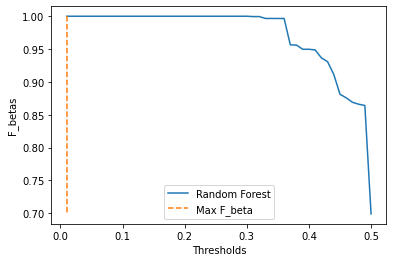

In [78]:
# first random forest model, with fBeta curve where beta=5
rfc = RandomForestClassifier(n_estimators = 9, max_depth = 6, random_state = 4444)
rfc.fit(X_resampled, y_resampled)
y_preds_rfc = rfc.predict(X_val)

pickle.dump(rfc, open( "ran_forest_mod.p", "wb" ) )
print(classification_report(y_val, y_preds_rfc))

f_betas = []
f_max = 0
t_max = 0
for t in np.arange(1, 51)/100:
    predicted_proba = rfc.predict_proba(X_val)
    predicted = (predicted_proba[:,1] >= t).astype('int')
    f_beta = fbeta_score(y_val, predicted, beta = 5)
    f_betas.append(f_beta)
    if f_beta > f_max:
        f_max = f_beta
        max_t = t
print(max_t)
plt.plot(np.arange(1, 51)/100, f_betas, label = 'Random Forest')  
plt.plot([max_t]*len(f_betas), f_betas, linestyle='--', label = 'Max F_beta')
plt.xlabel('Thresholds')
plt.ylabel('F_betas')
plt.legend()

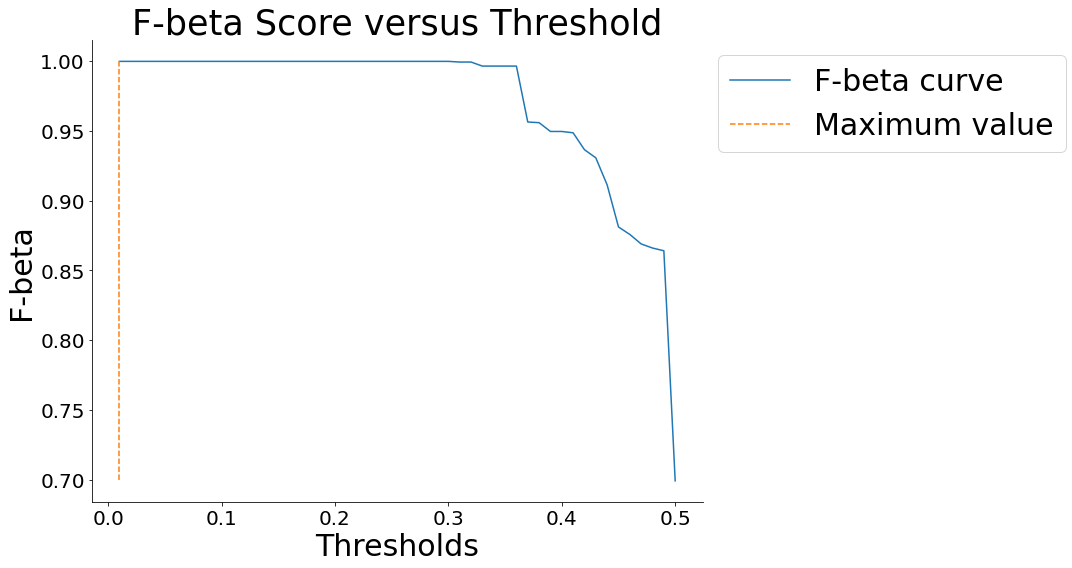

In [79]:
# larger f_beta graph
plt.figure(figsize=(15, 8))
plt.plot(np.arange(1, 51)/100, f_betas, label = 'Random Forest')  
plt.plot([max_t]*len(f_betas), f_betas, linestyle='--', label = 'Max F_beta')
plt.xlabel('Thresholds', fontsize = 30)
plt.ylabel('F-beta', fontsize = 30)
plt.legend(labels=['F-beta curve', 'Maximum value'], bbox_to_anchor=(1, 1), fontsize= 30)

plt.title("F-beta Score versus Threshold", fontsize = 35)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
sns.despine()
plt.savefig('fbetaplot.png')

Text(0, 0.5, 'Precision')

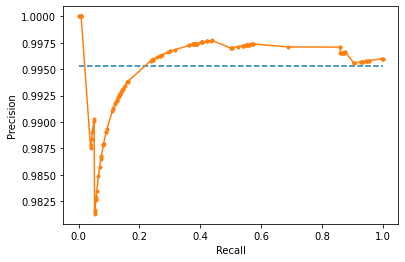

In [80]:
# precision recall curve
pos_probs = predicted_proba[:, 1]
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')

In [81]:
#use grid search CV to find best parameters for Random Forest Classifier
cv_result = {}
best_estimators = {}
best_params = {}
    
clf = GridSearchCV(RandomForestClassifier(), 
                   param_grid = {"max_features": ["log2","Auto","None"],
                 "min_samples_split":[2,3,5],
                 "min_samples_leaf":[1,3,5],
                 "bootstrap":[True,False],
                 "n_estimators":[5, 10, 50,100,150],
                 'max_depth' : [3, 5, 7, 9],
                 "criterion":["gini","entropy"]},
                   cv =10, scoring = 'f1', 
                   n_jobs = -1, 
                   verbose = False)

clf.fit(X_resampled,y_resampled)
cv_result = clf.best_score_
best_estimators = clf.best_estimator_
best_params = clf.best_params_

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
14400 fits failed out of a total of 21600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C

In [82]:
print(best_params)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}


In [83]:
y_pred =  best_estimators.fit(X_resampled,y_resampled).predict(X_val)

F1S=accuracy_score(y_pred, y_val)

print('f1 score :', "%.3f" %F1S)

f1 score : 0.875


In [3]:
from sklearn import preprocessing

In [84]:
print(classification_report(y_pred, y_val))

              precision    recall  f1-score   support

           0       0.38      0.01      0.02       249
           1       0.88      1.00      0.93      1751

    accuracy                           0.87      2000
   macro avg       0.63      0.50      0.48      2000
weighted avg       0.81      0.87      0.82      2000



The threshold with highest F-beta is:  0.01
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       1.00      1.00      1.00      1992

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      1.00      0.99      2000



C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.15

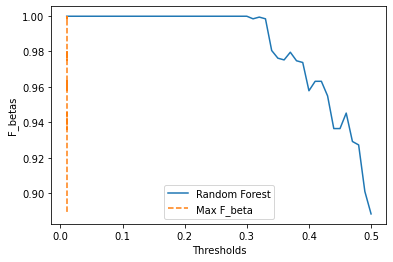

In [85]:
f_betas = []
f_max = 0
t_max = 0
for t in np.arange(1, 51)/100:
    predicted_proba = best_estimators.fit(X_resampled,y_resampled).predict_proba(X_val)
    predicted = (predicted_proba[:,1] >= t).astype('int')
    f_beta = fbeta_score(y_val, predicted, beta = 5)
    f_betas.append(f_beta)
    if f_beta > f_max:
        f_max = f_beta
        max_t = t
print('The threshold with highest F-beta is: ', max_t)
print(classification_report(y_val, (predicted_proba[:,1] >= max_t).astype('int')))
plt.plot(np.arange(1, 51)/100, f_betas, label = 'Random Forest')  
plt.plot([max_t]*len(f_betas), f_betas, linestyle='--', label = 'Max F_beta')
plt.xlabel('Thresholds')
plt.ylabel('F_betas')
plt.legend()

pickle.dump(best_estimators.fit(X_resampled,y_resampled), open( "ran_forest_mod.p", "wb" ) )
0.15

In [4]:
import preprocess

In [3]:
!pip install preprocess

  Using cached preprocess-2.0.0-py3-none-any.whl (12 kB)
